# Programming Exercise 1: Linear Regression


## 1. Linear regression with one variable

In this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

The file **ex1data1.txt** contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

### 1.1 Loading and Plotting the Data
When tackling a problem using machine learning, often times, the first thing we do is to load and plot the data. In this case, a scatter plot can completely be used to visualize the data has since the data just 2 properties. Most problems encountered in real life are multi-dimensional and 2d plot would not be sufficient to completely create a visualization of the data.


To load and plot the data, two python libraries(pandas and matplotlib) should be used. The libraries are first imported in the codeblock below.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

and is loaded below

In [2]:
data = pd.read_csv('data/ex1data1.txt', names=['population','profit']);
X = (data.iloc[:,0]).values
y = (data.iloc[:,1]).values
m = len(y)

#display first five records
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


The data can now be plotted using a scatter plot

Text(0,0.5,'Profit in $10,000s')

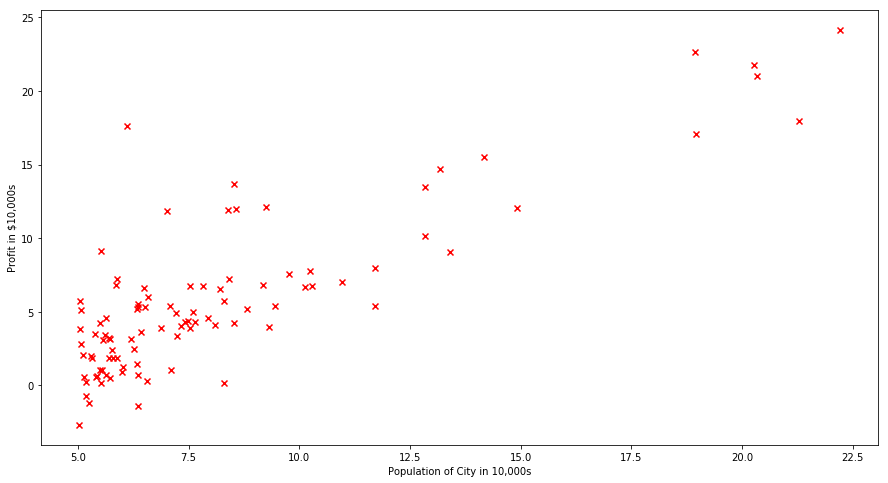

In [3]:
plt.figure(figsize=(15,8))
plt.scatter(X,y,c='r', marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

### 1.2 Gradient Descent
In this part of the assigment, you are to fit the linear regression parameters $\theta$ to the data using gradient descent.

#### 1.2.1 Update Equation
The objective of linear regression is to minimize the cost function
$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^m (h_{\theta} (x^{(i)})-y^{(i)})^2 \tag{1}$$
where $h(\theta)(x)$ is given by
$$h(\theta)(x) = \theta^Tx = \theta_0 + \theta_1x_1$$ 

The parameters of your model are the $\theta_j$ values, and they are to be adjusted to minimize the cost function $J(\theta)$ using batch gradient descent where each iteration performs an update to the parameters.

$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$ 

#### 1.2.2 Implementation
First, Let's set up the data for linear regression. We add another dimension to our data to accommodate the $\theta_0$ intercept term and also initialize the initial parameters to 0 and the learning rate **alpha** to 0.01.

In [4]:
import numpy as np

X = np.concatenate((np.ones(m).reshape(m,1), X.reshape(m,1)), axis=1) # Add a column of ones to x
theta = np.zeros(2) # initialize fitting parameters
iterations = 1500
alpha = 0.01

#### 1.2.3 Computing the cost $J(\theta)$
As you perform gradient descent to learn minimize the cost function $J\theta$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J\theta$ so you can check the convergence of your gradient implementation.

Your next task is to implement the function in **computecost.py** 
Once you have implemented the function, run the code cell below to check how accurate your implemention is. The code cell below uses $\theta$ initialized to zeros to compute the cost which should be **$32.07$**.

In [5]:
from importlib import reload
import utils
from utils import *
reload(utils)
import computecost
reload(computecost)

print('\nTesting the cost function ...\n')
#compute and display initial cost
theta = np.zeros(2)
J = computecost.compute_cost(X, y, theta);

color = checkCost(J)

# further testing of the cost function
J = computecost.compute_cost(X, y, [-1 , 2]);

furtherCheckCost(J, color)



Testing the cost function ...

With theta = [0 ; 0]
Cost computed =  32.072733877455676 
 
Expected cost value (approx)  32.07 
 

With theta = [-1 ; 2]
Cost computed =  54.24245508201238 
Expected cost value (approx)  54.24 


#### 1.2.4 Gradient Descent
Next, you will implement gradient descent in the file **gradientdescent.py**.
The loop structure has been written for you, and you only need to supply
the updates to $\theta$ within each iteration.
As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not X and y. That is, we minimize the value of $J(\theta)$
by changing the values of the vector $\theta$, not by changing X or y. Refer to the
equations in this handout and to the video lectures if you are uncertain.
A good way to verify that gradient descent is working correctly is to look
at the value of $J(\theta)$ and check that it is decreasing with each step. The
starter code for gradientdescent.py calls compute_cost on every iteration
and prints the cost. Assuming you have implemented gradient descent and
compute_cost correctly, your value of $J(\theta)$ should never increase, and should
converge to a steady value by the end of the algorithm.
After you are finished, your final parameters will be used to plot the
linear fit. The result should look something like Figure 2:
Your final values for $\theta$ will also be used to make predictions on profits in
areas of 35,000 and 70,000 people. Please ensure to use vectorized implementation.


Running Gradient Descent ...

Theta found by gradient descent:
 [-3.6303, 1.1664] 
Expected theta values (approx)

 [-3.6303, 1.1664] 

For population = 35,000, we predict a profit of 4519.767868

For population = 70,000, we predict a profit of 45342.450129




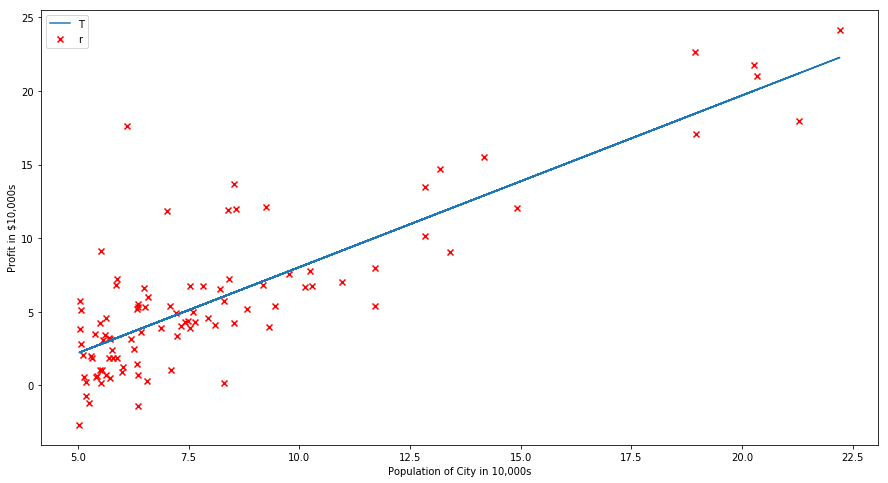

In [6]:
import gradientdescent
reload(gradientdescent)
reload(utils)

print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta = np.zeros(2)
theta, J_history = gradientdescent.gradient_descent(X, y, theta, alpha, iterations)

color = checkGradientDescent(theta, J_history)

plt.figure(figsize=(15,8))
plt.scatter(X[:,1],y,c='r', marker='x')
plt.plot(X[:,1],np.dot(X,theta))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend("Training data, Linear Regression")

print(color)
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([[1, 3.5]]) ,theta)[0];
print('For population = 35,000, we predict a profit of %f\n'% (predict1*10000));
predict2 = np.dot(np.array([[1, 7]]) ,theta)[0]
print('For population = 70,000, we predict a profit of %f\n'%(predict2*10000));
print(bcolors.ENDC)

### 1.3 Visualizing $J(\theta)$
To understand the cost function $J(\theta)$ better, you will now plot the cost over
a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything
new for this part, but you should understand how the code you have written
already is creating these images.

Visualizing J(theta_0, theta_1) ...


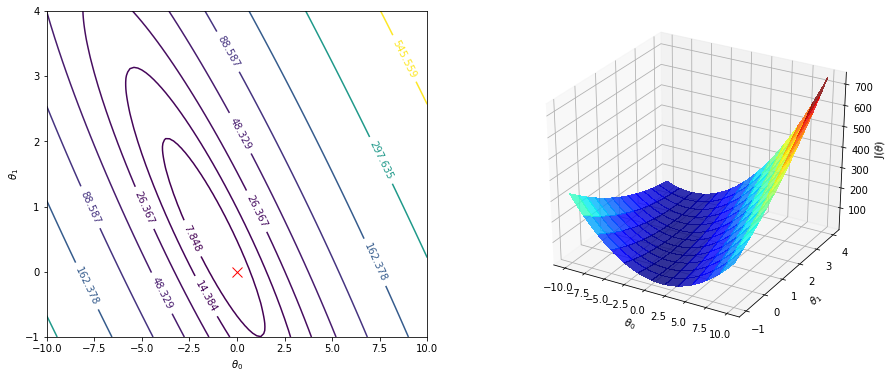

In [7]:
# ============= Part 4: Visualizing J(theta_0, theta_1) =============
print ('Visualizing J(theta_0, theta_1) ...')
from matplotlib import use, cm
from mpl_toolkits.mplot3d import axes3d
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, X.shape[0])
theta1_vals = np.linspace(-1, 4, X.shape[0])

# initialize J_vals to a matrix of 0's
J_vals=np.array(np.zeros(X.shape[0]).T)

for i in range(theta0_vals.size):
    col = []
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        col.append(computecost.compute_cost(X, y, t.T))
    J_vals=np.column_stack((J_vals,col))

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals[:,1:].T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Right plot
ax2 = fig.gca(projection='3d')
ax2.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=8, cstride=8, alpha=0.8,
                cmap=plt.cm.jet, linewidth=0, antialiased=False)
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_zlabel(r'J($\theta$)')


# left plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = ax1.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
#ax1.scatter(theta1_vals,theta0_vals, c='r')
ax1.clabel(ax, inline=1, fontsize=10)
ax1.set_xlabel(r'$\theta_0$')
ax1.set_ylabel(r'$\theta_1$')
ax1.plot(0.0, 0.0, 'rx', linewidth=2, markersize=10)
plt.show()